# 1. Взять все признаки из датасета с урока. Применить модель Random Forest.

In [47]:
# импортируем нужные библиотеки
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.ensemble import RandomForestRegressor

# загружаем данные
boston_data = load_boston()

X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, shuffle = True, random_state = 42)

In [49]:
# обучение модели
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 2. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.

In [50]:
# предсказания зависимой переменной у на тестовом и обучающем наборе
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# метрики качества на тестовом и обучающем множестве
print('MAE train:', mae(y_train, y_train_pred))
print('MAE test:', mae(y_test, y_test_pred))

print('MSE train:', mse(y_train, y_train_pred))
print('MSE test:', mse(y_test, y_test_pred))

print('R2 train:', r2(y_train, y_train_pred))
print('R2 test:', r2(y_test, y_test_pred))

MAE train: 0.903477722772276
MAE test: 2.0395392156862746
MSE train: 1.9783925024752465
MSE test: 7.901513892156864
R2 train: 0.9772267182453291
R2 test: 0.8922527442109116


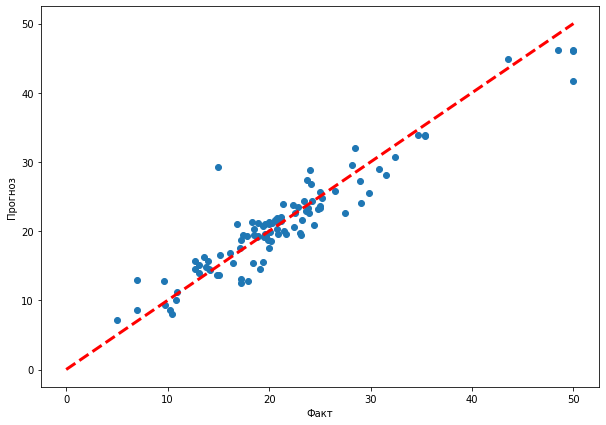

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_test_pred)
plt.plot([0,50], [0, 50], '--k', color='red', linewidth=3)
plt.xlabel('Факт')
plt.ylabel('Прогноз')
plt.show()

In [52]:
# пробуем настроить гиперпараметры
def fit_predict(train, test, y_train, y_test, criterion = 'squared_error', n_estimators = 100, max_depth = None, min_sample_split = 2):  # пайтон на criterion = 'mse' выдал ошибку и сказал заменить на criterion = 'squared_error'
  rf = RandomForestRegressor(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)
  rf.fit(train, y_train)
  y_pred_train = rf.predict(train)
  y_pred = rf.predict(test)
  print('train', r2(y_train, y_pred_train), 'test', r2(y_test, y_pred))

In [53]:
# максимальная глубина деревьев
for max_depth in range(2,21):
  print('R^2 score using max_depth={0}:'.format(max_depth), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth = max_depth)

R^2 score using max_depth=2: train 0.7709106981816058 test 0.7131290966247285
R^2 score using max_depth=3: train 0.8705727225584604 test 0.8247631049028509
R^2 score using max_depth=4: train 0.9095464824600872 test 0.8511270949047637
R^2 score using max_depth=5: train 0.9323679553315724 test 0.8640000591600265
R^2 score using max_depth=6: train 0.9511890965563741 test 0.8678440325355692
R^2 score using max_depth=7: train 0.961353178465569 test 0.8814291580957881
R^2 score using max_depth=8: train 0.9674115119120256 test 0.8761656861311091
R^2 score using max_depth=9: train 0.9743110095463902 test 0.892312518872356
R^2 score using max_depth=10: train 0.9724613819097261 test 0.8761275901626737
R^2 score using max_depth=11: train 0.975932743281822 test 0.8754399619915993
R^2 score using max_depth=12: train 0.9760791142971955 test 0.8828862948315831
R^2 score using max_depth=13: train 0.977379060723034 test 0.8860216272689905
R^2 score using max_depth=14: train 0.9769144061695239 test 0.87

In [54]:
# минимальное число объектов, чтобы узел дерева расщепился
for min_sample_split in range(5,51,5):
  print('R^2 score using min_sample_leaf = {0}:'.format(min_sample_split), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=min_sample_split)

R^2 score using min_sample_leaf = 5: train 0.8679403845018081 test 0.8202767547080129
R^2 score using min_sample_leaf = 10: train 0.868192624765251 test 0.8154138942924707
R^2 score using min_sample_leaf = 15: train 0.8716819652901878 test 0.817210658248349
R^2 score using min_sample_leaf = 20: train 0.8704017176123444 test 0.8193517148292706
R^2 score using min_sample_leaf = 25: train 0.8676611365895067 test 0.8070735431256548
R^2 score using min_sample_leaf = 30: train 0.8666308741640217 test 0.8217985294671181
R^2 score using min_sample_leaf = 35: train 0.8717353277419518 test 0.8397388947207755
R^2 score using min_sample_leaf = 40: train 0.8682259780146832 test 0.819360149981051
R^2 score using min_sample_leaf = 45: train 0.8713475023904369 test 0.8162875116851622
R^2 score using min_sample_leaf = 50: train 0.870348881693673 test 0.8260566248359491


In [55]:
# критерий расщепления
for criterion in ['squared_error', 'absolute_error']:  # Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  print('R^2 score using {0} criterion:'.format(criterion), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion=criterion)

R^2 score using squared_error criterion: train 0.8681809221762935 test 0.8219059002230242
R^2 score using absolute_error criterion: train 0.8361863216968803 test 0.7973914929685867


In [56]:
# число "деревьев" в "случайном лесу"
for n_estimators in range(100,1001,100):
  print('R^2 score using n_estimators = {0}:'.format(n_estimators), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion='squared_error', n_estimators=n_estimators)

R^2 score using n_estimators = 100: train 0.8686153304801645 test 0.8284950639327625
R^2 score using n_estimators = 200: train 0.866137956549268 test 0.8168755912847928
R^2 score using n_estimators = 300: train 0.8717574849901588 test 0.8317031517756369
R^2 score using n_estimators = 400: train 0.8701389702130374 test 0.8206288922034377
R^2 score using n_estimators = 500: train 0.8701581150587432 test 0.8218316716975376
R^2 score using n_estimators = 600: train 0.8687764313739457 test 0.819486663437508
R^2 score using n_estimators = 700: train 0.8695358218438161 test 0.8237375135988584
R^2 score using n_estimators = 800: train 0.8694269332773715 test 0.821912141154766
R^2 score using n_estimators = 900: train 0.8690867570765809 test 0.8242171275424995
R^2 score using n_estimators = 1000: train 0.86987169542706 test 0.8238830935151087


In [57]:
model2 = RandomForestRegressor(criterion='squared_error', n_estimators=300, max_depth=3, random_state=5, min_samples_split=15)

model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=300,
                      random_state=5)

In [58]:
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)

print('R2 train:', r2(y_train, y_train_pred2))
print('R2 test:', r2(y_test, y_test_pred2))

R2 train: 0.8685861956584837
R2 test: 0.8248676153984816
